In [ ]:
# ME 241 Engineering Computation Final Project: 1D heat conduction
# Danny Randles, Edgar Rodriguez Marquez, Will Suddeth

The temp at x = 10m is 164.444 Celsius


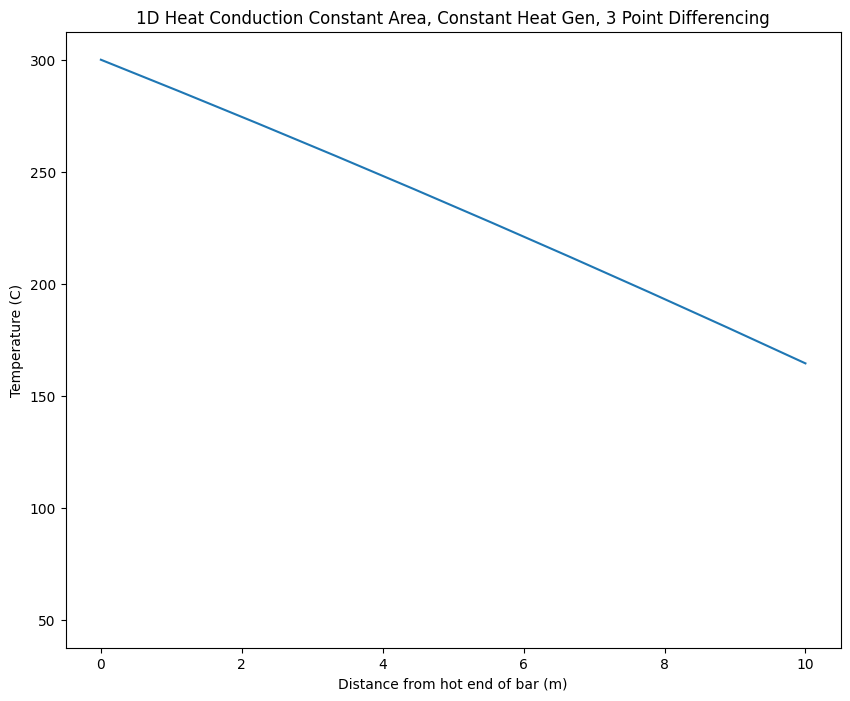

In [40]:
# importing modules for matrix and plotting
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

# defining material properties
LBar   =         10     # length of bar: meters
kCond  =         100    # thermal conductivity: W/m/C
hConv  =         10      # convection coefficient: W/m^2/C
xsInit =         0.1    # initial cross-section area: m^2
xsFin  =         0.05   # final cross-section area: m^2
Tair   =         20     # air temp: Celsius
n      =         10     # number of sections
sHeat  =         2      # heat gen per unit length: W/m
sHeatF =         10     # heat gen variable by length: W/m
# boundary condition
Tinit  =         300    # initial bar temp: C

# 3 point, constant area, constant heat gen

dx = LBar/(n-1)
dx2 = dx*dx

# setting up LHS matrix
LM = np.zeros((n,n))

# defining initial value
LM[0,0]  = 1
LM[-1,-1]  = 1


# for loop
for i in range(1, n-1):
    LM[i,i-1] =  1
    LM[i,i]   = -2
    LM[i,i+1] =  1


# defining the last row
LM[-1,-1] = 1 + ((hConv *dx)/kCond)
LM[-1,-2] = -1

# matrix b

b = np.full(n, ((-sHeat/((kCond)*(xsInit)))*(dx2)))
b[0]  = 300
b[-1] = (hConv*dx/kCond)*Tair


# solve the linear equation
vectors3pconstant = np.linalg.solve(LM, b)


xvals = np.linspace(0, 10, n)
print(f"The temp at x = 10m is {vectors3pconstant[-1].round(3)} Celsius")


plt.figure(figsize=(10,8))
plt.plot(xvals, vectors3pconstant)
plt.plot(5, 50)

plt.title("1D Heat Conduction Constant Area, Constant Heat Gen, 3 Point Differencing")
plt.xlabel('Distance from hot end of bar (m)')
plt.ylabel('Temperature (C)')
plt.show()

The temp at x = 10m is 137.35 Celsisus


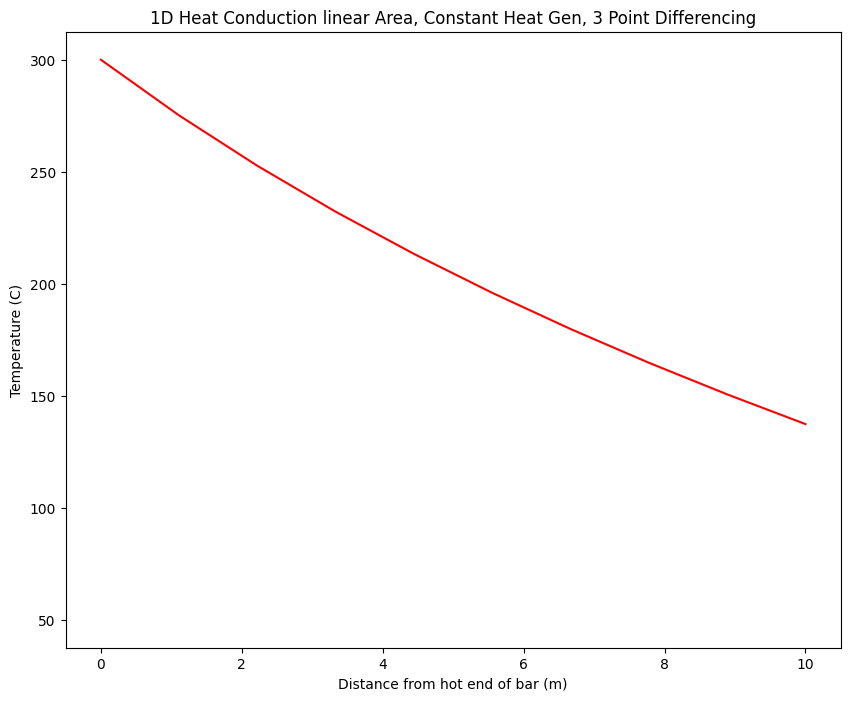

In [39]:
# 3 point, linear area, constant heat gen

#variation of cross sectional area
# array of steps for area

# differential lengths
dx = LBar/(n-1)
dx2 = dx*dx

# defining the area function
def Area(x):
    return 0.05+0.005*(x)
# defining the derivative of the area function
Darea = 0.005

# setting up LHS matrix
LM = np.zeros((n,n))

# defining initial value
LM[0,0]  = 1
LM[-1,-1]  = 1


# creating our RHS matrix
b = np.full(n, 0)

# for loop for different areas
for i in range(1, n-1):
    # creating the Left side matrix for rows 2 and beyond
    # including linear x-sectional area function
    LM[i,i-1] =  1*((-(Darea*(dx))/2)  + (Area(i)))
    LM[i,i]   = -2*((Area(i)))
    LM[i,i+1] =  1*(((Darea*(dx))/2)   + (Area(i)))
    # creating our right side matrix
    # sHeat=2
    b[i] = (-sHeat/((kCond)*(dx2)))

# defining the last row
LM[-1,-1] = 1 + ((hConv *dx)/kCond)
LM[-1,-2] = -1

# matrix b

b[0]  = 300
b[1]  = ((sHeat/(kCond))*(dx2))
b[-2]  = ((sHeat/(kCond))*(dx2))
b[-1] = (hConv*dx/kCond)*Tair


# solve the linear equation
vectors3plineararea = np.linalg.solve(LM, b)

xvals = np.linspace(0, 10, n)
print(f"The temp at x = 10m is {vectors3plineararea[-1].round(3)} Celsisus")

plt.figure(figsize=(10,8))
plt.plot(xvals, vectors3plineararea, 'r-')
plt.plot(5, 50)
plt.title("1D Heat Conduction linear Area, Constant Heat Gen, 3 Point Differencing")
plt.xlabel('Distance from hot end of bar (m)')
plt.ylabel('Temperature (C)')
plt.show()

The temp at x = 10m is 137.35 Celsisus


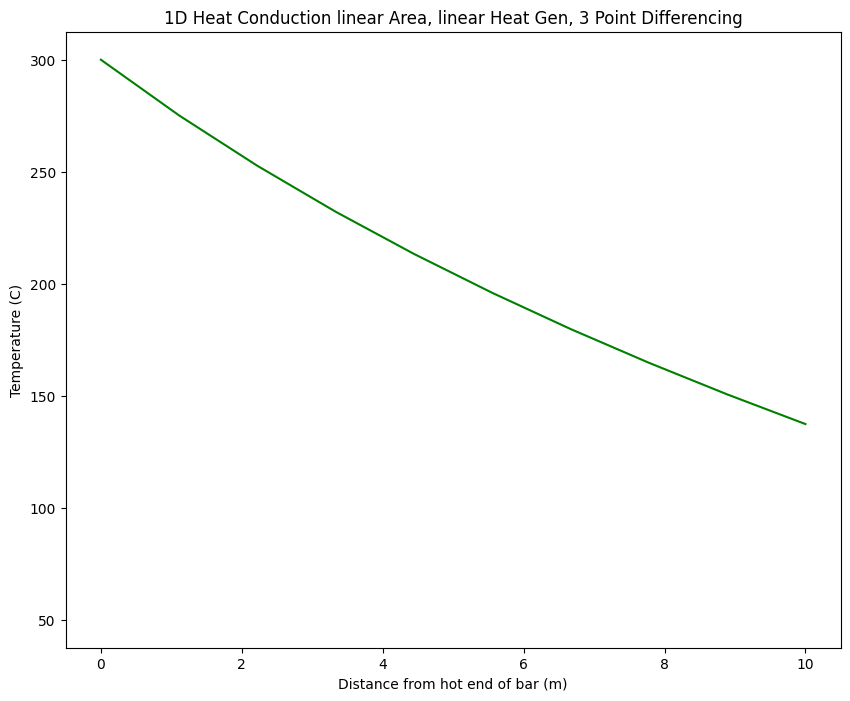

In [44]:
# 3 point, linear area, linear heat gen

#variation of cross sectional area
# array of steps for area

# differential lengths
dx = LBar/(n-1)
dx2 = dx*dx

# defining the area function with range(0.05,0.1)
def Area(x):
    return 0.05+0.005*(x)
# derviative of the area
Darea = 0.005

# defining the heat generation function as linear
# let it range from x(0)=0 to x(10)=10
def sHeatGen(x):
    return 10 - x

# setting up LHS matrix
LM = np.zeros((n,n))

# defining initial value
LM[0,0]  = 1



# creating our RHS matrix
b = np.full(n, 0)

# for loop for different areas
for i in range(1, n-1):
    # creating the Left side matrix for rows 2 and beyond
    # including linear x-sectional area function
    LM[i,i-1] =  1*((-(Darea*(dx))/2)  + (Area(i)))
    LM[i,i]   = -2*((Area(i)))
    LM[i,i+1] =  1*(((Darea*(dx))/2)   + (Area(i)))
    # creating our right side matrix
    # including linear x-sectional area function
    b[i] = (-sHeatGen(i))/(((kCond)*(dx2)))

# defining the last row
LM[-1,-1] = 1 + ((hConv *dx)/kCond)
LM[-1,-2] = -1

# matrix b

b[0]  = 300
b[-1] = (hConv*dx/kCond)*Tair


# solve the linear equation
vectors3pLinAreaLinHeatGen = np.linalg.solve(LM, b)

xvals = np.linspace(0, 10, n)
print(f"The temp at x = 10m is {vectors3pLinAreaLinHeatGen[-1].round(3)} Celsisus")
plt.figure(figsize=(10,8))
plt.plot(xvals, vectors3pLinAreaLinHeatGen, '-g')
plt.plot(5, 50)
plt.title("1D Heat Conduction linear Area, linear Heat Gen, 3 Point Differencing")
plt.xlabel('Distance from hot end of bar (m)')
plt.ylabel('Temperature (C)')
plt.show()

The temp at x = 10m is 133.661 Celsius


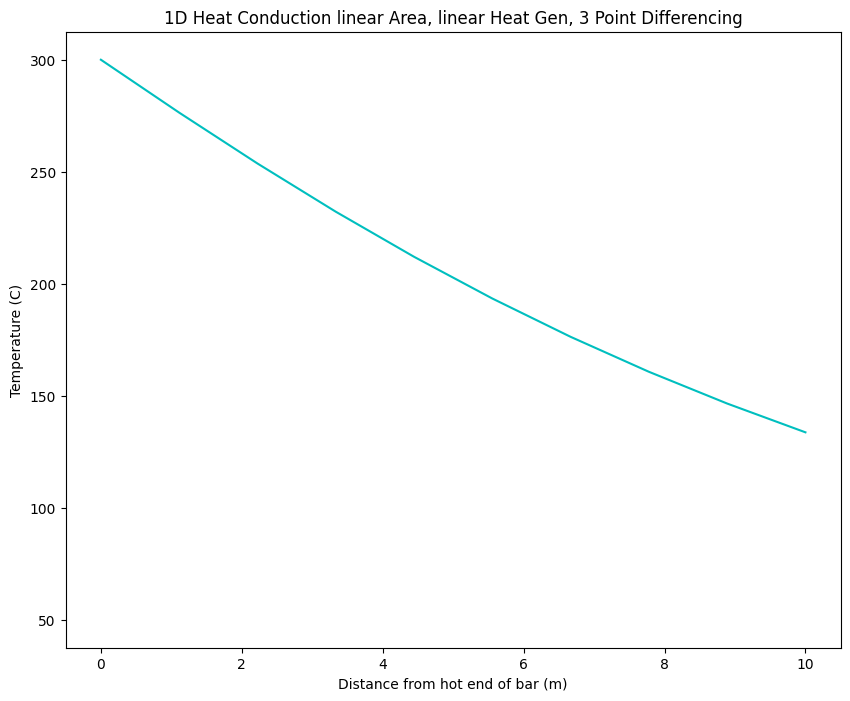

In [68]:
# 3 point, quadratic area, linear heat gen

#variation of cross sectional area
# array of steps for area

# differential lengths
dx = LBar/(n-1)
dx2 = dx*dx

# defining the area function with range(0.05,0.1)
def QArea(x):
    return 0.05+(0.0004*x**2)+0.001*x
# derviative of the area
def QDarea(x):
     return 0.0008*x +0.001

# defining the heat generation function as linear
# let it range from x(0)=0 to x(10)=10
def sHeatGen(x):
    return x

# setting up LHS matrix
LM = np.zeros((n,n))

# defining initial value
LM[0,0]  = 1

# creating our RHS matrix
b = np.full(n, 0)

# for loop for different areas
for i in range(1, n-1):
    # creating the Left side matrix for rows 2 and beyond
    # including linear x-sectional area function
    LM[i,i-1] =  1*((-(QDarea(i)*(dx))/2)  + (QArea(i)))
    LM[i,i]   = -2*((QArea(i)))
    LM[i,i+1] =  1*(((QDarea(i)*(dx))/2)   + (QArea(i)))
    # creating our right side matrix
    # including linear x-sectional area function
    b[i] = (-sHeatGen(i))/(((kCond)*(dx2)))

# defining the last row
LM[-1,-1] = 1 + ((hConv *dx)/kCond)
LM[-1,-2] = -1

# matrix b

b[0]  = 300
b[-1] = (hConv*dx/kCond)*Tair


# solve the linear equation
vectors3pQuadAreaLinHeatGen = np.linalg.solve(LM, b)
print(f"The temp at x = 10m is {vectors3pQuadAreaLinHeatGen[-1].round(3)} Celsius")

xvals = np.linspace(0, 10, n)

plt.figure(figsize=(10,8))
plt.plot(xvals, vectors3pQuadAreaLinHeatGen, '-c')
plt.plot(5, 50)
plt.title("1D Heat Conduction linear Area, linear Heat Gen, 3 Point Differencing")
plt.xlabel('Distance from hot end of bar (m)')
plt.ylabel('Temperature (C)')
plt.show()

The temp at x = 10m is 161.761 Celsisus


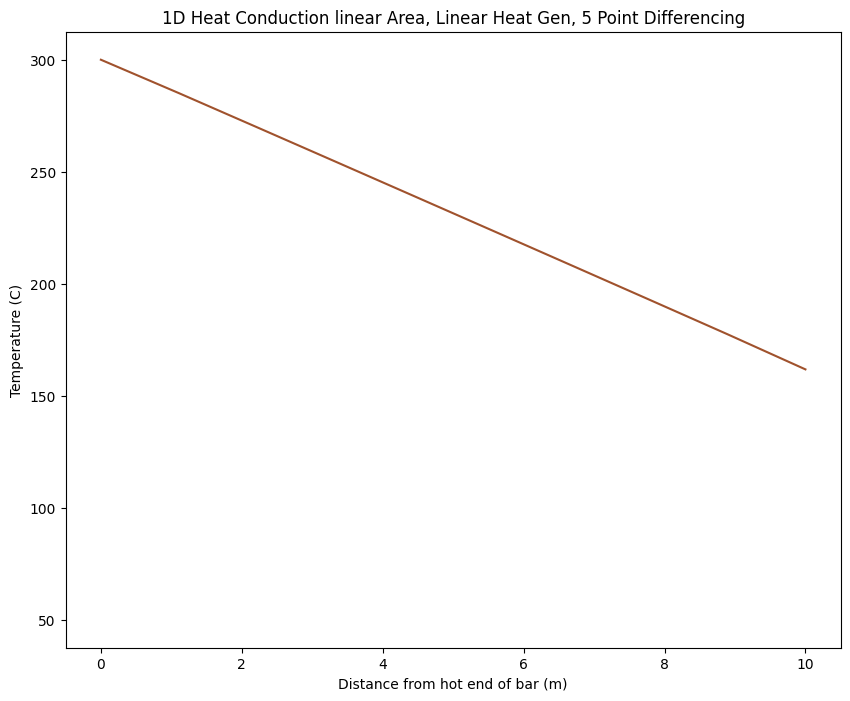

In [72]:
# 5-point, constant area( A(x)), constant heat gen( s(x))

#
dx = LBar/(n-1)
dx2 = dx*dx

# setting up LHS matrix
LM = np.zeros((n,n))

# defining initial value
LM[0,0]  = 1
LM[-1,-1]  = 1


# defining 2nd row
LM[1,0]  =  1
LM[1,1]  = -2
LM[1,2]  =  1

# defining 2nd to last row
LM[-2,-1]  =  1
LM[-2,-2]  = -2
LM[-2,-3]  =  1

# matrix b
b = np.full(n, ((-sHeat/(kCond))*12*(dx2)))
b[0]  = 300
b[-1] = (hConv*dx/kCond)*Tair


# for loop
for i in range(2, n-2):
    LM[i,i-2] =  -1
    LM[i,i-1] =  16
    LM[i,i]   = -30
    LM[i,i+1] =  16
    LM[i,i+2] = -1
    # Heat gen linear application
    b[i] = (-sHeat*12*(dx2))/(kCond)

# defining the last row
LM[-1,-1] = 1 + (hConv *dx/kCond)
LM[-1,-2] = -1




# solve the linear equation
vectors5pconstant = np.linalg.solve(LM, b)
print(f"The temp at x = 10m is {vectors5pconstant[-1].round(3)} Celsisus")


xvals = np.linspace(0, 10, n)
plt.figure(figsize=(10,8))
plt.plot(xvals, vectors5pconstant, 'sienna')
plt.plot(5, 50)

plt.title("1D Heat Conduction linear Area, Linear Heat Gen, 5 Point Differencing")
plt.xlabel('Distance from hot end of bar (m)')
plt.ylabel('Temperature (C)')
plt.show() 

The temp at x = 10m is 144.335 Celsisus


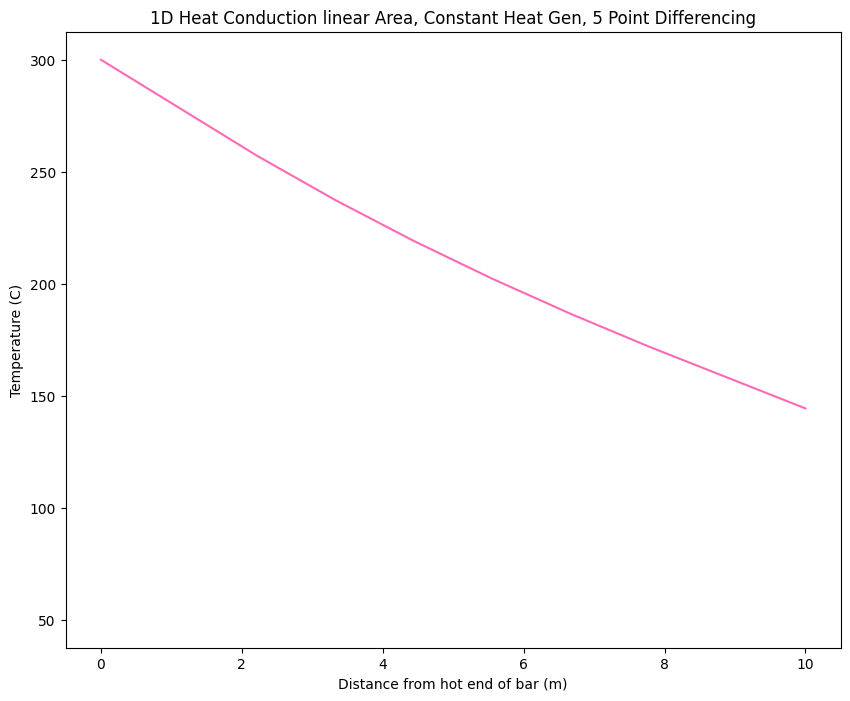

In [73]:
# 5-point, linear area( A(x)), constant heat gen( s(x))

def Area(x):
    return 0.05+0.005*(x)
# derviative of the area
Darea = 0.005

#
dx = LBar/(n-1)
dx2 = dx*dx

# setting up LHS matrix
LM = np.zeros((n,n))

# defining initial value
LM[0,0]  = 1


# defining 2nd row
LM[1,0]  =  1
LM[1,1]  = -2
LM[1,2]  =  1

# defining 2nd to last row
LM[-2,-1]  =  1
LM[-2,-2]  = -2
LM[-2,-3]  =  1

# matrix b
b = np.full(n, ((-sHeat/(kCond))*(dx2)))
b[0]  = 300
b[-1] = (hConv*dx/kCond)*Tair


# for loop
for i in range(2, n-2):
    LM[i,i-2] =  1*((dx*Darea)-Area(i))
    LM[i,i-1] =  (-8*(Darea*dx))+(16*Area(i))
    LM[i,i]   = -30*Area(i)
    LM[i,i+1] =  (8*(Darea*dx))+(16*Area(i))
    LM[i,i+2] = -1*((dx*Darea)+Area(i))
    # Heat gen linear application
    #b[i] = (-sHeatGen(i)*12*(dx2))/(kCond)

# defining the last row
LM[-1,-1] = 1 + ((hConv *dx)/kCond)
LM[-1,-2] = -1


# solve the linear equation
vectors5pLinArea = np.linalg.solve(LM, b)
print(f"The temp at x = 10m is {vectors5pLinArea[-1].round(3)} Celsisus")

xvals = np.linspace(0, 10, n)
plt.figure(figsize=(10,8))
plt.plot(xvals, vectors5pLinArea, 'hotpink')
plt.plot(5, 50)

plt.title("1D Heat Conduction linear Area, Constant Heat Gen, 5 Point Differencing")
plt.xlabel('Distance from hot end of bar (m)')
plt.ylabel('Temperature (C)')
plt.show() 

The temp at x = 10m is 142.493 Celsisus


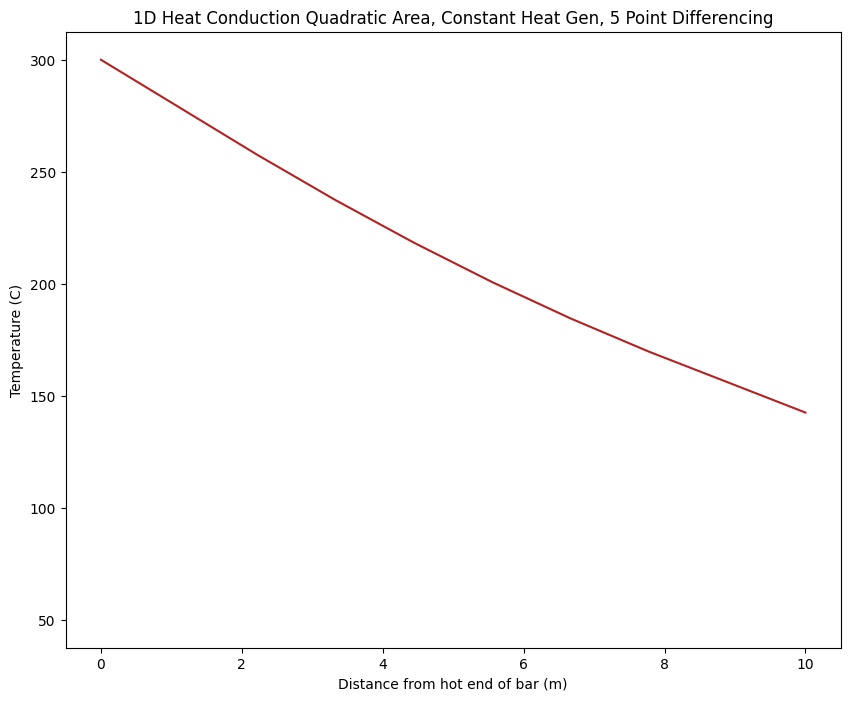

In [74]:
# 5-point, Quadratic area( A(x)), constant heat gen( s(x))

# defining the area function with range(0.05,0.1)
def QArea(x):
    return 0.05+(0.0004*x**2)+0.001*x
# derviative of the area
def QDarea(x):
     return 0.0008*x+0.001
#
dx = LBar/(n-1)
dx2 = dx*dx

# setting up LHS matrix
LM = np.zeros((n,n))

# defining initial value
LM[0,0]  = 1


# defining 2nd row
LM[1,0]  =  1
LM[1,1]  = -2
LM[1,2]  =  1

# defining 2nd to last row
LM[-2,-1]  =  1
LM[-2,-2]  = -2
LM[-2,-3]  =  1

# matrix b
b = np.full(n, ((-sHeat/(kCond))*(dx2)))
b[0]  = 300
b[-1] = (hConv*dx/kCond)*Tair


# for loop
for i in range(2, n-2):
    LM[i,i-2] =  1*((dx*QDarea(i))-QArea(i))
    LM[i,i-1] =  (-8*(QDarea(i)*dx))+(16*QArea(i))
    LM[i,i]   = -30*QArea(i)
    LM[i,i+1] =  (8*(QDarea(i)*dx))+(16*QArea(i))
    LM[i,i+2] = -1*((dx*QDarea(i))+QArea(i))
    # Heat gen linear application
    #b[i] = (-sHeatGen(i)*12*(dx2))/(kCond)

# defining the last row
LM[-1,-1] = 1 + ((hConv *dx)/kCond)
LM[-1,-2] = -1


# solve the linear equation
vectors5pQuadArea = np.linalg.solve(LM, b)

print(f"The temp at x = 10m is {vectors5pQuadArea[-1].round(3)} Celsisus")

xvals = np.linspace(0, 10, n)
plt.figure(figsize=(10,8))
plt.plot(xvals, vectors5pQuadArea, 'firebrick')
plt.plot(5, 50)

plt.title("1D Heat Conduction Quadratic Area, Constant Heat Gen, 5 Point Differencing")
plt.xlabel('Distance from hot end of bar (m)')
plt.ylabel('Temperature (C)')
plt.show() 

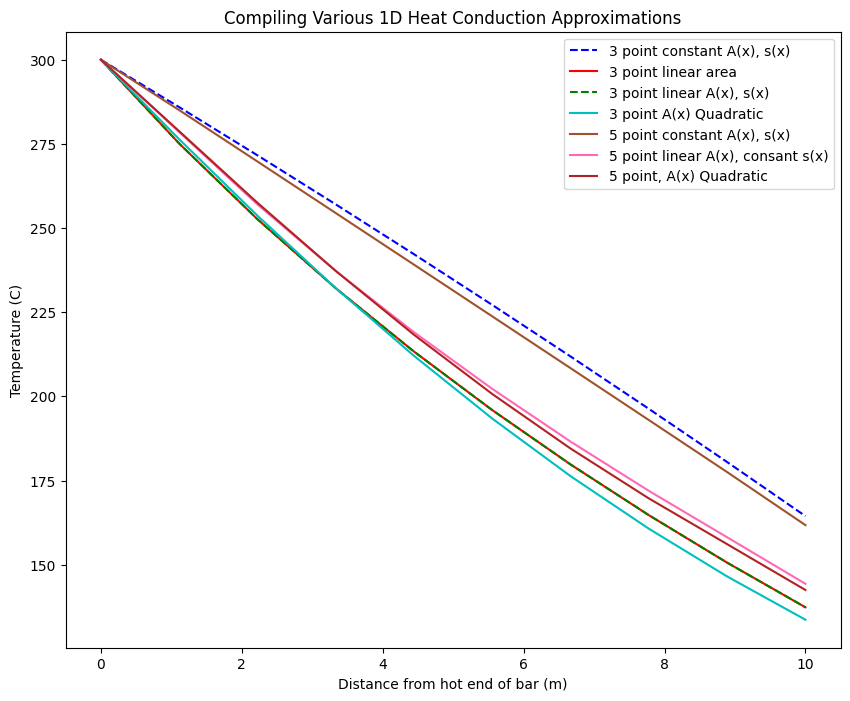

In [76]:
# grouping of all plots
plt.figure(figsize=(10,8))
plt.plot(xvals, vectors3pconstant, '--b', label= '3 point constant A(x), s(x)')
plt.plot(xvals, vectors3plineararea, '-r', label = '3 point linear area')
plt.plot(xvals, vectors3pLinAreaLinHeatGen, '--g', label = '3 point linear A(x), s(x)')
plt.plot(xvals, vectors3pQuadAreaLinHeatGen, 'c-', label = '3 point A(x) Quadratic')

plt.plot(xvals, vectors5pconstant, 'sienna', label ='5 point constant A(x), s(x)')
plt.plot(xvals, vectors5pLinArea, 'hotpink', label = '5 point linear A(x), consant s(x)')
plt.plot(xvals, vectors5pQuadArea, 'firebrick', label = '5 point, A(x) Quadratic')
plt.legend()
plt.plot(5, 200)

plt.title("Compiling Various 1D Heat Conduction Approximations")
plt.xlabel('Distance from hot end of bar (m)')
plt.ylabel('Temperature (C)')
plt.show() 